## Perkenalan Dataset
1. Sumber Dataset:
Dataset dapat diperoleh dari berbagai sumber, seperti public repositories [Kaggle](https://www.kaggle.com/datasets/aniruddhawankhede/mental-heath-analysis-among-teenagers/code|)

##### Data terdiri dari 5000 baris dan 11 fitur
- Gender: Nominal (M = Male, F = Female). Tidak memiliki urutan.
= Support_System: Ordinal (Moderate, High, Other). Ada tingkatan.

- User_ID: Diskret. ID unik, tidak relevan untuk analisis.
- Age: Diskret. Usia peserta dalam tahun (13-19 tahun).
- Social_Media_Hours: Kontinu. Jumlah jam menggunakan media sosial per hari.
- Exercise_Hours: Kontinu. Jumlah jam olahraga per hari.
- Sleep_Hours: Kontinu. Jumlah jam tidur per hari.
- Screen_Time_Hours: Kontinu. Total waktu layar per hari (termasuk media sosial, game, dll.).
- Survey_Stress_Score: Diskret. Skor stres yang dilaporkan peserta (1-5).
- Wearable_Stress_Score: Kontinu. Skor stres dari wearable device (0-1).





## Import Library

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

## Memuat Dataset

In [3]:
data = pd.read_csv('mental_health_analysis.csv')
df = pd.DataFrame(data)  # Pastikan data sudah dalam bentuk DataFrame



## Exploratory Data Analysis (EDA)

In [4]:
data

,User_ID,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance
0,1,16,F,9.654486,2.458001,5.198926,8.158189,3,0.288962,Moderate,Excellent
1,2,17,M,9.158143,0.392095,8.866097,5.151993,5,0.409446,Moderate,Good
2,3,15,M,5.028755,0.520119,4.943095,9.209325,2,0.423837,Moderate,Poor
3,4,17,F,7.951103,1.022630,5.262773,9.823658,5,0.666021,Moderate,Average
4,5,17,F,1.357459,1.225462,6.196080,11.338990,5,0.928060,High,Poor
...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,14,M,0.088148,1.003339,8.684888,5.922202,1,0.750205,Moderate,Average
4996,4997,15,F,7.161276,1.024644,5.312684,10.224924,4,0.427209,Moderate,Excellent
4997,4998,14,M,3.444383,2.877972,9.227726,4.059322,4,0.002893,High,Good
4998,4999,18,F,7.866525,2.395839,4.317831,10.657076,2,0.612063,High,Average


In [5]:
data.isna().sum()

User_ID                   0
 Age                      0
 Gender                   0
 Social_Media_Hours       0
 Exercise_Hours           0
 Sleep_Hours              0
 Screen_Time_Hours        0
 Survey_Stress_Score      0
 Wearable_Stress_Score    0
 Support_System           0
 Academic_Performance     0
dtype: int64

In [6]:
data.describe()

,User_ID,Age,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,15.493200,4.932081,1.498151,7.057370,7.068630,3.015800,0.496618
std,1443.520003,1.715151,2.853928,0.873984,1.722211,2.883494,1.414762,0.289768
min,1.000000,13.000000,0.000528,0.000473,4.001515,2.000481,1.000000,0.000102
25%,1250.750000,14.000000,2.473150,0.734431,5.611836,4.574327,2.000000,0.244615
50%,2500.500000,16.000000,4.898176,1.483432,7.068874,7.118979,3.000000,0.500404
75%,3750.250000,17.000000,7.369195,2.276089,8.519411,9.526335,4.000000,0.749929
max,5000.000000,18.000000,9.995052,2.999774,9.999229,11.999010,5.000000,0.999812


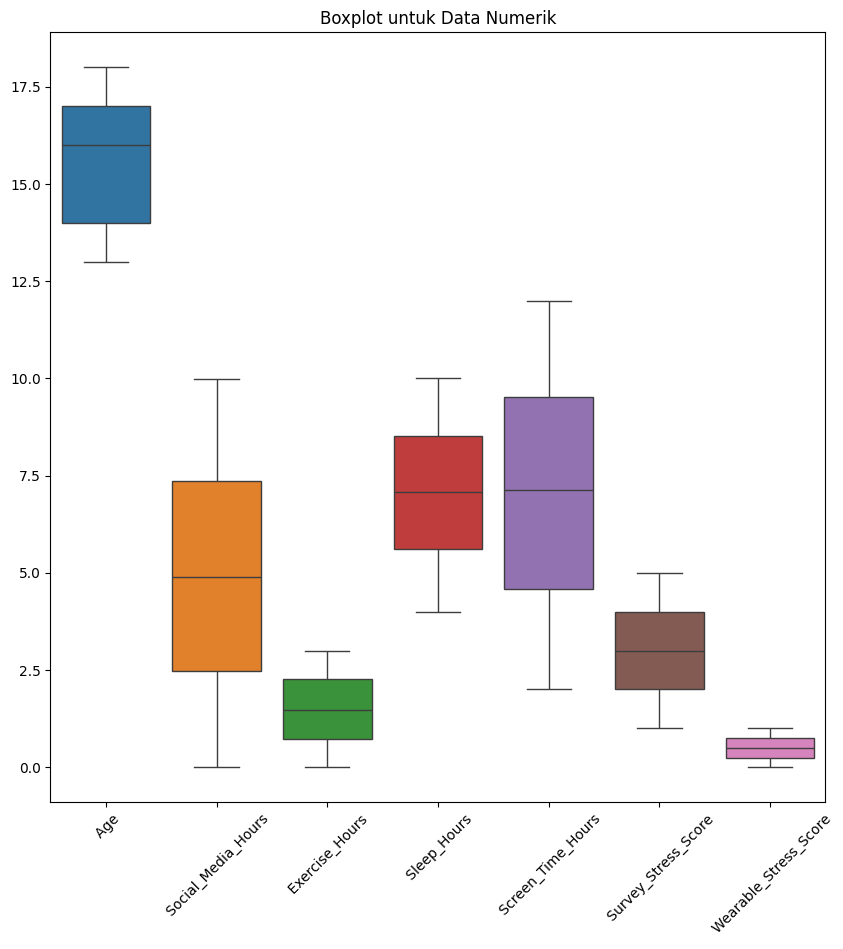

In [7]:
# Menampilkan semua boxplot untuk data numerik
numerical_columns = df.select_dtypes(include=["number"]).drop(columns=["User_ID"], errors="ignore")

plt.figure(figsize=(10, 10))
sns.boxplot(data=numerical_columns)
plt.xticks(rotation=45)  # Memiringkan label sumbu x agar lebih mudah dibaca
plt.title("Boxplot untuk Data Numerik")
plt.show()

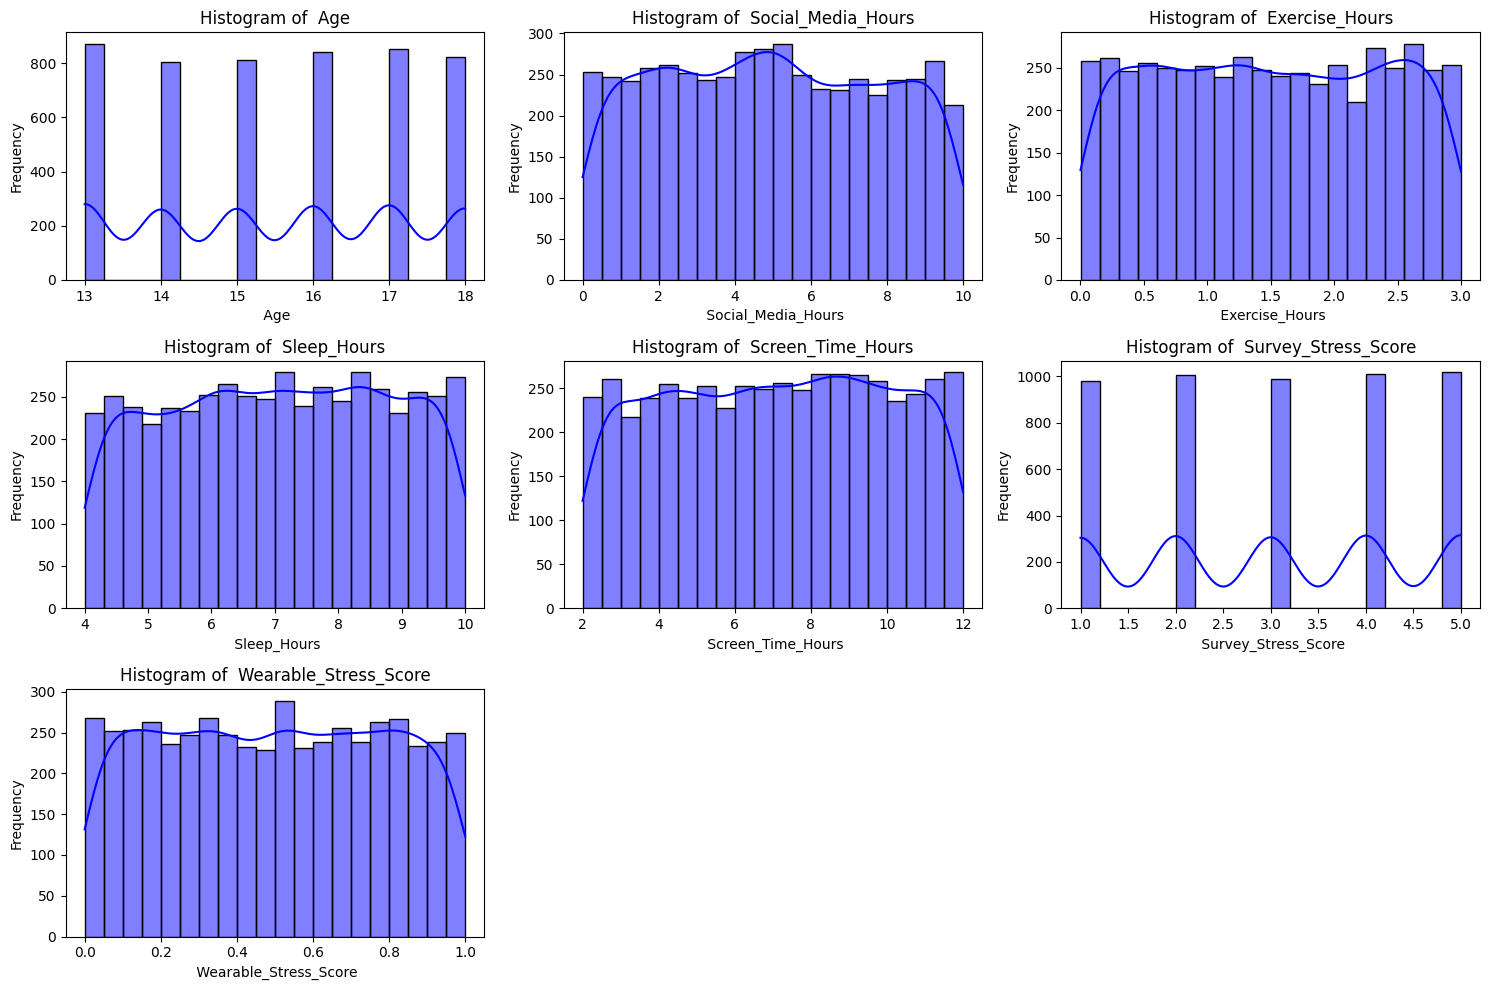

In [8]:
std_dev = numerical_columns.std()

# Membuat histogram untuk setiap fitur numerik
plt.figure(figsize=(15, 10))  # Menentukan ukuran figure
for i, col in enumerate(numerical_columns.columns):
    plt.subplot(3, 3, i + 1)  # Menyesuaikan jumlah subplot (3x3 bisa diubah)
    sns.histplot(df[col], bins=20, kde=True, color="blue")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()  # Menyesuaikan layout agar tidak bertumpuk
plt.show()

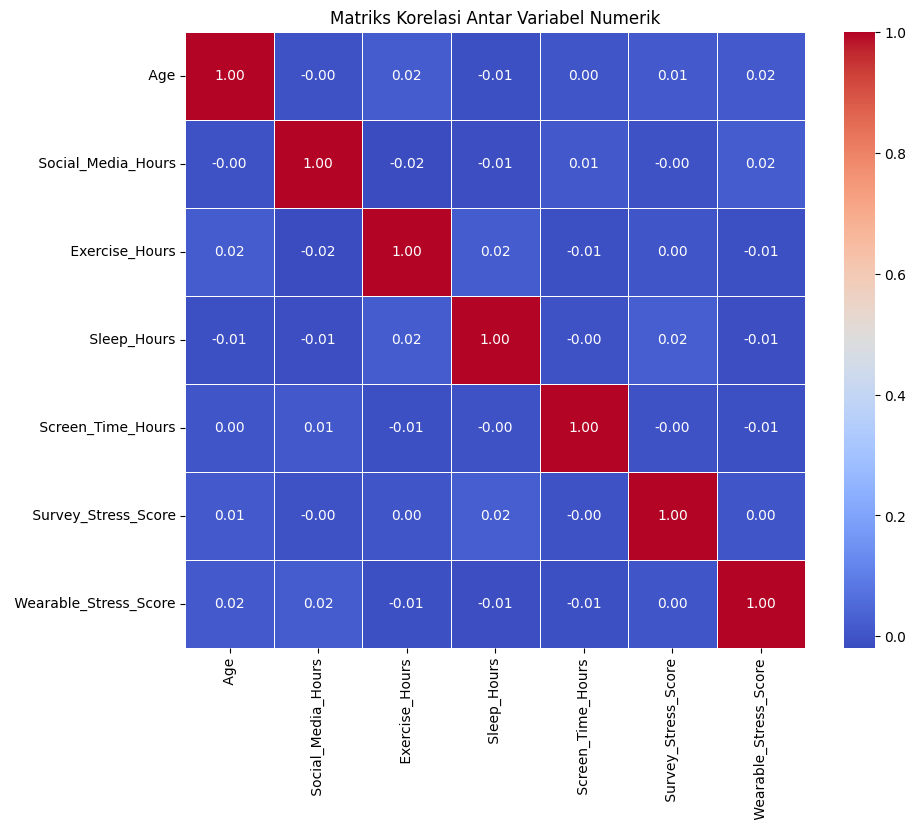

In [9]:
numerical_columns = df.select_dtypes(include=["number"]).drop(columns=["User_ID"], errors="ignore")

# Membuat matriks korelasi
correlation_matrix = numerical_columns.corr()

# Menampilkan heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Antar Variabel Numerik")
plt.show()

## Data Preprocessing


In [10]:
df

,User_ID,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance
0,1,16,F,9.654486,2.458001,5.198926,8.158189,3,0.288962,Moderate,Excellent
1,2,17,M,9.158143,0.392095,8.866097,5.151993,5,0.409446,Moderate,Good
2,3,15,M,5.028755,0.520119,4.943095,9.209325,2,0.423837,Moderate,Poor
3,4,17,F,7.951103,1.022630,5.262773,9.823658,5,0.666021,Moderate,Average
4,5,17,F,1.357459,1.225462,6.196080,11.338990,5,0.928060,High,Poor
...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,14,M,0.088148,1.003339,8.684888,5.922202,1,0.750205,Moderate,Average
4996,4997,15,F,7.161276,1.024644,5.312684,10.224924,4,0.427209,Moderate,Excellent
4997,4998,14,M,3.444383,2.877972,9.227726,4.059322,4,0.002893,High,Good
4998,4999,18,F,7.866525,2.395839,4.317831,10.657076,2,0.612063,High,Average


### Encoding data

In [11]:
df.columns = df.columns.str.strip()  # Menghapus spasi di awal dan akhir nama kolom


# Encoding Label untuk Gender, Support_System, dan Academic_Performance
label_encoder = LabelEncoder()

df["Gender"] = label_encoder.fit_transform(df["Gender"])  # F -> 0, M -> 1
df["Support_System"] = label_encoder.fit_transform(df["Support_System"])  
df["Academic_Performance"] = label_encoder.fit_transform(df["Academic_Performance"])  

# Menampilkan hasil encoding
df

,User_ID,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance
0,1,16,0,9.654486,2.458001,5.198926,8.158189,3,0.288962,2,1
1,2,17,1,9.158143,0.392095,8.866097,5.151993,5,0.409446,2,2
2,3,15,1,5.028755,0.520119,4.943095,9.209325,2,0.423837,2,3
3,4,17,0,7.951103,1.022630,5.262773,9.823658,5,0.666021,2,0
4,5,17,0,1.357459,1.225462,6.196080,11.338990,5,0.928060,0,3
...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,14,1,0.088148,1.003339,8.684888,5.922202,1,0.750205,2,0
4996,4997,15,0,7.161276,1.024644,5.312684,10.224924,4,0.427209,2,1
4997,4998,14,1,3.444383,2.877972,9.227726,4.059322,4,0.002893,0,2
4998,4999,18,0,7.866525,2.395839,4.317831,10.657076,2,0.612063,0,0


### Standarisasi & Normalisasi data untuk data numerikal saja

In [12]:
# Identifikasi kolom numerik (kecuali User_ID)
numerical_cols = [ "Social_Media_Hours", "Exercise_Hours", "Sleep_Hours", 
                  "Screen_Time_Hours", "Wearable_Stress_Score"]

# Normalisasi dengan MinMaxScaler
minmax_scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_cols] = minmax_scaler.fit_transform(df_normalized[numerical_cols])

df_normalized

,User_ID,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance
0,1,16,0,0.965925,0.819367,0.199645,0.615861,3,0.288944,2,1
1,2,17,1,0.916263,0.130571,0.811073,0.315198,5,0.409463,2,2
2,3,15,1,0.503098,0.173256,0.156990,0.720991,2,0.423858,2,3
3,4,17,0,0.795493,0.340798,0.210290,0.782433,5,0.666112,2,0
4,5,17,0,0.135767,0.408425,0.365900,0.933988,5,0.928227,0,3
...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,14,1,0.008767,0.334366,0.780860,0.392230,1,0.750321,2,0
4996,4997,15,0,0.716467,0.341470,0.218612,0.822565,4,0.427230,2,1
4997,4998,14,1,0.344574,0.959390,0.871367,0.205914,4,0.002792,0,2
4998,4999,18,0,0.787031,0.798641,0.052739,0.865787,2,0.612138,0,0


In [13]:
standard_scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_cols] = standard_scaler.fit_transform(df_standardized[numerical_cols])
df_standardized

,User_ID,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance
0,1,16,0,1.654869,1.098356,-1.079212,0.377898,3,-0.716698,2,1
1,2,17,1,1.480936,-1.265659,1.050340,-0.664759,5,-0.300863,2,2
2,3,15,1,0.033878,-1.119161,-1.227774,0.742471,2,-0.251193,2,3
3,4,17,0,1.057954,-0.544139,-1.042135,0.955543,5,0.584673,2,0
4,5,17,0,-1.252652,-0.312038,-0.500157,1.481115,5,1.489070,0,3
...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,14,1,-1.697456,-0.566213,0.945111,-0.397623,1,0.875225,2,0
4996,4997,15,0,0.781176,-0.541833,-1.013151,1.094717,4,-0.239558,2,1
4997,4998,14,1,-0.521333,1.578928,1.260341,-1.043737,4,-1.704030,0,2
4998,4999,18,0,1.028315,1.027224,-1.590870,1.244603,2,0.398445,0,0


## Pembagunan Model Clustering

### Menggunakan Metode Elbow Untuk Mencari jumlah Centroid yang optimal

In [14]:
df_standardized = df_standardized.drop(columns=['User_ID'])  


In [15]:
df_standardized

,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance
0,16,0,1.654869,1.098356,-1.079212,0.377898,3,-0.716698,2,1
1,17,1,1.480936,-1.265659,1.050340,-0.664759,5,-0.300863,2,2
2,15,1,0.033878,-1.119161,-1.227774,0.742471,2,-0.251193,2,3
3,17,0,1.057954,-0.544139,-1.042135,0.955543,5,0.584673,2,0
4,17,0,-1.252652,-0.312038,-0.500157,1.481115,5,1.489070,0,3
...,...,...,...,...,...,...,...,...,...,...
4995,14,1,-1.697456,-0.566213,0.945111,-0.397623,1,0.875225,2,0
4996,15,0,0.781176,-0.541833,-1.013151,1.094717,4,-0.239558,2,1
4997,14,1,-0.521333,1.578928,1.260341,-1.043737,4,-1.704030,0,2
4998,18,0,1.028315,1.027224,-1.590870,1.244603,2,0.398445,0,0


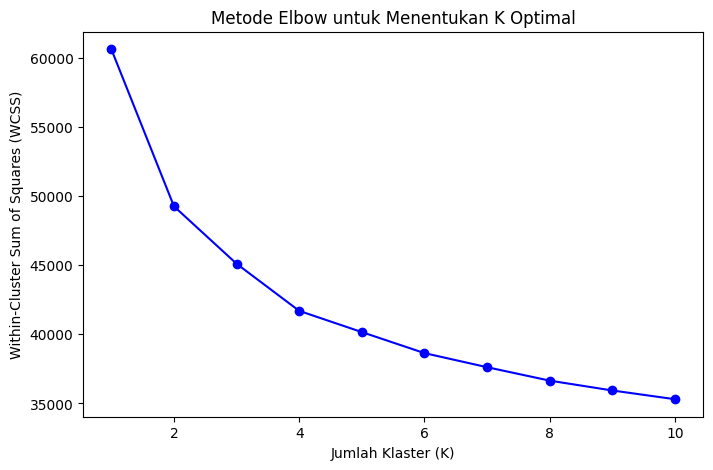

In [16]:
# Menentukan jumlah cluster optimal dengan Metode Elbow
wcss = []
K_range = range(1, 11)  # Coba dari 1 hingga 10 klaster

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_standardized)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker="o", linestyle="-", color="b")
plt.xlabel("Jumlah Klaster (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Metode Elbow untuk Menentukan K Optimal")
plt.show()


### Clustering

In [17]:
# Latih model K-Means dengan jumlah klaster optimal (contoh: K=3)
optimal_k = 4  # Sesuaikan dengan hasil Elbow
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_standardized_cluster = df_standardized.copy()
df_standardized_cluster["Cluster"] = kmeans.fit_predict(df_standardized)

In [18]:
df_standardized

,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance
0,16,0,1.654869,1.098356,-1.079212,0.377898,3,-0.716698,2,1
1,17,1,1.480936,-1.265659,1.050340,-0.664759,5,-0.300863,2,2
2,15,1,0.033878,-1.119161,-1.227774,0.742471,2,-0.251193,2,3
3,17,0,1.057954,-0.544139,-1.042135,0.955543,5,0.584673,2,0
4,17,0,-1.252652,-0.312038,-0.500157,1.481115,5,1.489070,0,3
...,...,...,...,...,...,...,...,...,...,...
4995,14,1,-1.697456,-0.566213,0.945111,-0.397623,1,0.875225,2,0
4996,15,0,0.781176,-0.541833,-1.013151,1.094717,4,-0.239558,2,1
4997,14,1,-0.521333,1.578928,1.260341,-1.043737,4,-1.704030,0,2
4998,18,0,1.028315,1.027224,-1.590870,1.244603,2,0.398445,0,0


In [19]:
df_standardized_cluster

,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance,Cluster
0,16,0,1.654869,1.098356,-1.079212,0.377898,3,-0.716698,2,1,3
1,17,1,1.480936,-1.265659,1.050340,-0.664759,5,-0.300863,2,2,0
2,15,1,0.033878,-1.119161,-1.227774,0.742471,2,-0.251193,2,3,2
3,17,0,1.057954,-0.544139,-1.042135,0.955543,5,0.584673,2,0,0
4,17,0,-1.252652,-0.312038,-0.500157,1.481115,5,1.489070,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...
4995,14,1,-1.697456,-0.566213,0.945111,-0.397623,1,0.875225,2,0,2
4996,15,0,0.781176,-0.541833,-1.013151,1.094717,4,-0.239558,2,1,1
4997,14,1,-0.521333,1.578928,1.260341,-1.043737,4,-1.704030,0,2,1
4998,18,0,1.028315,1.027224,-1.590870,1.244603,2,0.398445,0,0,3


### Visualisasi Hasil Clustering

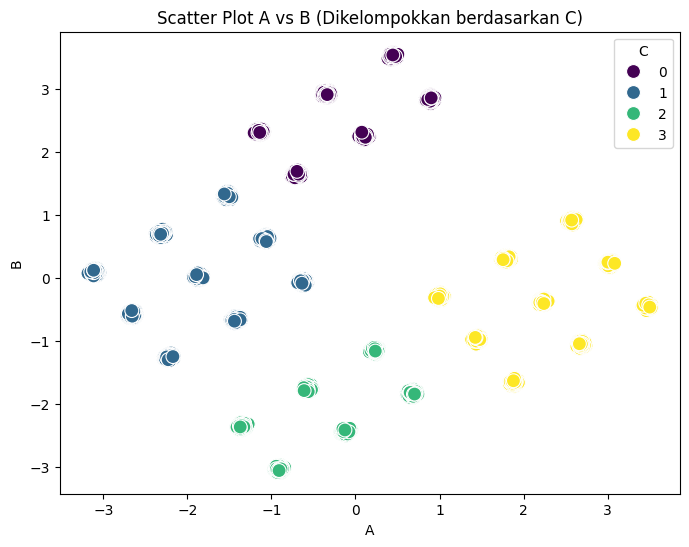

In [20]:
# Reduksi dimensi dengan PCA menjadi 2 komponen untuk visualisasi
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_standardized_cluster)

# Membuat DataFrame hasil PCA dan cluster
df_pca = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
df_pca["Cluster"] = df_standardized_cluster["Cluster"]

# Membuat DataFrame
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df_pca["Cluster"], palette="viridis", s=100)
plt.title("Scatter Plot A vs B (Dikelompokkan berdasarkan C)")
plt.xlabel("A")
plt.ylabel("B")
plt.legend(title="C")
plt.show()

### Analisis dan hasil interpretasi Hasil Cluster

In [21]:
df_standardized_cluster

,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance,Cluster
0,16,0,1.654869,1.098356,-1.079212,0.377898,3,-0.716698,2,1,3
1,17,1,1.480936,-1.265659,1.050340,-0.664759,5,-0.300863,2,2,0
2,15,1,0.033878,-1.119161,-1.227774,0.742471,2,-0.251193,2,3,2
3,17,0,1.057954,-0.544139,-1.042135,0.955543,5,0.584673,2,0,0
4,17,0,-1.252652,-0.312038,-0.500157,1.481115,5,1.489070,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...
4995,14,1,-1.697456,-0.566213,0.945111,-0.397623,1,0.875225,2,0,2
4996,15,0,0.781176,-0.541833,-1.013151,1.094717,4,-0.239558,2,1,1
4997,14,1,-0.521333,1.578928,1.260341,-1.043737,4,-1.704030,0,2,1
4998,18,0,1.028315,1.027224,-1.590870,1.244603,2,0.398445,0,0,3


In [22]:
# inverse data set
df["Cluster"] = kmeans.fit_predict(df_standardized)
df

,User_ID,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance,Cluster
0,1,16,0,9.654486,2.458001,5.198926,8.158189,3,0.288962,2,1,3
1,2,17,1,9.158143,0.392095,8.866097,5.151993,5,0.409446,2,2,0
2,3,15,1,5.028755,0.520119,4.943095,9.209325,2,0.423837,2,3,2
3,4,17,0,7.951103,1.022630,5.262773,9.823658,5,0.666021,2,0,0
4,5,17,0,1.357459,1.225462,6.196080,11.338990,5,0.928060,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,14,1,0.088148,1.003339,8.684888,5.922202,1,0.750205,2,0,2
4996,4997,15,0,7.161276,1.024644,5.312684,10.224924,4,0.427209,2,1,1
4997,4998,14,1,3.444383,2.877972,9.227726,4.059322,4,0.002893,0,2,1
4998,4999,18,0,7.866525,2.395839,4.317831,10.657076,2,0.612063,0,0,3


In [26]:
df.to_csv("hasil_cluster.csv", index=False)


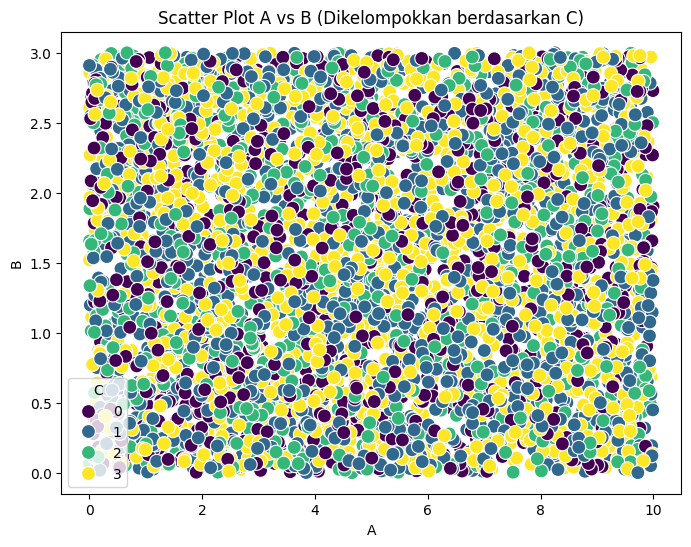

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Social_Media_Hours"], y=df["Exercise_Hours"], hue=df["Cluster"], palette="viridis", s=100)
plt.title("Scatter Plot A vs B (Dikelompokkan berdasarkan C)")
plt.xlabel("A")
plt.ylabel("B")
plt.legend(title="C")
plt.show()

In [24]:
summary = df_standardized_cluster.groupby('Cluster').mean()
summary

,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance
Cluster,,,,,,,,,,
0,17.015733,0.495575,-0.024593,0.013754,0.011789,-0.023463,4.512291,0.015343,0.972468,1.519174
1,13.984718,0.484385,0.039123,-0.032657,0.028301,-0.007386,4.001329,-0.008616,1.008638,1.522259
2,13.964286,0.503061,-0.036471,0.005767,-0.014140,-0.006753,1.477551,-0.020373,1.030612,1.561224
3,16.975300,0.497997,0.001250,0.019699,-0.027187,0.027768,2.016021,0.011568,1.002670,1.506676


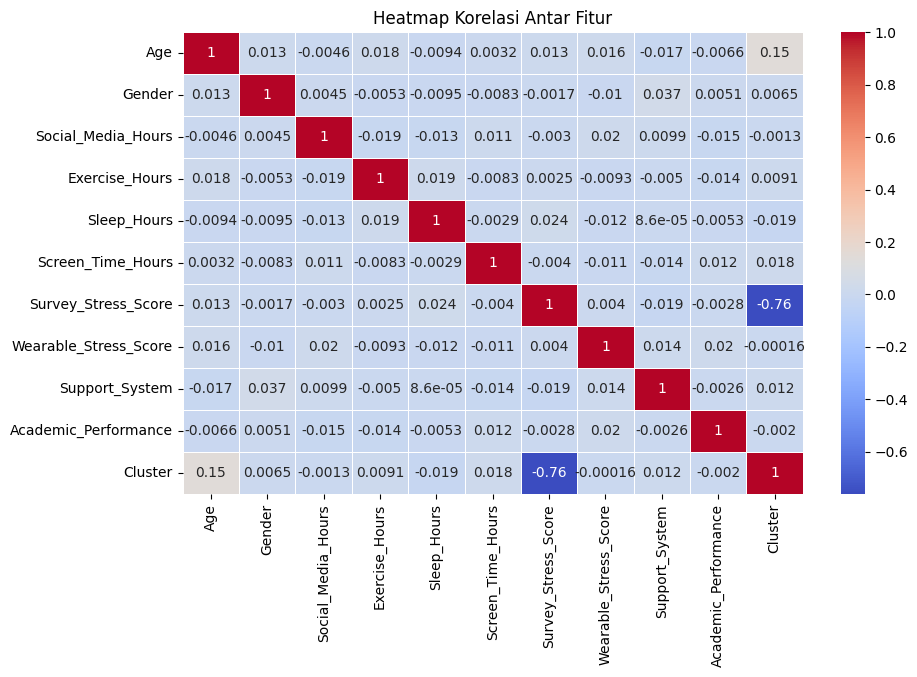

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df_standardized_cluster.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

## Kesimpulan Hasil Clustering
Setelah melakukan clustering terhadap dataset yang mencakup faktor usia, gender, kebiasaan penggunaan media sosial, olahraga, tidur, waktu layar, tingkat stres (dari survei dan wearable), sistem pendukung, dan kinerja akademik, berikut adalah analisis dari masing-masing cluster:

1️⃣ Cluster 0: "Kelompok Usia Lebih Tua dengan Stres Tinggi"
🔹 Karakteristik:

Usia tertinggi dibandingkan cluster lain (17.02 tahun).
Penggunaan media sosial sedikit lebih rendah dari rata-rata.
Olahraga dan tidur hampir normal, tetapi waktu layar sedikit lebih rendah.
Tingkat stres survei tertinggi (4.51) dibandingkan cluster lain.
Dukungan sosial sedikit lebih rendah, tetapi kinerja akademik cukup tinggi (1.52).
📌 Interpretasi:
Kelompok ini cenderung memiliki tingkat stres yang tinggi, meskipun akademik mereka cukup baik. Bisa jadi karena tekanan akademik atau kurangnya keseimbangan antara aktivitas dan istirahat.

2️⃣ Cluster 1: "Kelompok Usia Lebih Muda dengan Stres Sedang"
🔹 Karakteristik:

Usia lebih muda (13.98 tahun).
Penggunaan media sosial lebih tinggi dibandingkan cluster lain.
Olahraga sedikit lebih rendah, tetapi tidur cukup baik.
Tingkat stres lebih rendah (4.00) dibandingkan Cluster 0.
Dukungan sosial cukup tinggi, dengan kinerja akademik yang hampir sama (1.52).
📌 Interpretasi:
Kelompok ini lebih muda dan lebih aktif di media sosial, tetapi memiliki tingkat stres yang lebih rendah. Kemungkinan mereka memiliki mekanisme coping yang lebih baik atau beban akademik yang lebih rendah dibandingkan Cluster 0.

3️⃣ Cluster 2: "Kelompok dengan Stres Terendah & Akademik Terbaik"
🔹 Karakteristik:

Usia termuda (13.96 tahun).
Penggunaan media sosial sedikit lebih rendah.
Olahraga dan tidur mendekati normal.
Tingkat stres paling rendah (1.48) dari semua cluster.
Dukungan sosial lebih tinggi, dan kinerja akademik tertinggi (1.56).
📌 Interpretasi:
Kelompok ini memiliki keseimbangan yang baik dalam aktivitas, waktu tidur, dan dukungan sosial. Ini dapat berkontribusi pada tingkat stres yang lebih rendah dan performa akademik yang lebih baik dibandingkan cluster lain.

4️⃣ Cluster 3: "Kelompok dengan Aktivitas Seimbang dan Stres Sedang"
🔹 Karakteristik:

Usia mendekati Cluster 0 (16.98 tahun).
Penggunaan media sosial seimbang.
Olahraga lebih tinggi dari rata-rata, tetapi tidur sedikit lebih rendah.
Tingkat stres sedang (2.01).
Dukungan sosial cukup baik, dan kinerja akademik stabil (1.50).
📌 Interpretasi:
Kelompok ini memiliki keseimbangan yang baik dalam aktivitas sehari-hari. Meskipun tingkat stres mereka tidak serendah Cluster 2, mereka tetap memiliki kinerja akademik yang cukup baik dan tidak memiliki masalah yang signifikan dalam aspek lainnya.

🔍 Kesimpulan Utama
Tingkat stres memiliki dampak besar pada performa akademik.

Cluster dengan stres lebih rendah (Cluster 2) cenderung memiliki performa akademik yang lebih baik.
Cluster dengan stres lebih tinggi (Cluster 0) memiliki performa akademik yang sedikit lebih rendah.
Usia lebih muda cenderung memiliki stres lebih rendah.

Cluster 1 & 2 (lebih muda) memiliki tingkat stres lebih rendah dibandingkan Cluster 0.
Dukungan sosial berhubungan dengan tingkat stres dan performa akademik.

Cluster dengan dukungan sosial tinggi (Cluster 2) cenderung memiliki stres lebih rendah dan performa akademik lebih baik.
Penggunaan media sosial tidak selalu berkorelasi langsung dengan stres.

Cluster 1 menggunakan media sosial lebih tinggi, tetapi memiliki stres lebih rendah daripada Cluster 0.
Kemungkinan media sosial digunakan sebagai hiburan atau sarana relaksasi.
📝 Rekomendasi
Kelompok dengan stres tinggi (Cluster 0) dapat diberikan lebih banyak dukungan sosial dan teknik manajemen stres.
Kelompok yang lebih muda dengan stres lebih rendah (Cluster 2) dapat mempertahankan keseimbangan mereka untuk terus meningkatkan performa akademik.
Perlu penelitian lebih lanjut mengenai pengaruh media sosial terhadap stres dan kinerja akademik.
📊 Tertarik untuk menampilkan insight ini dalam grafik? Bisa dibuatkan bar chart atau heatmap untuk memperjelas perbedaan antar cluster! 🚀